In [ ]:

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder



real_estate = pd.read_excel("/regression_data.xls")

# Standardize column names as PB8 snake case
real_estate.columns = real_estate.columns.str.lower().str.replace(" ", "_")


real_estate

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
real_estate.info



<bound method DataFrame.info of                id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
2      5631500400 2015-02-25         2       1.00          770     10000   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0     0          3  ...        1180              0   
1         2.0           0     0          3  ...        2170            400   
2         1.0           0     0          3  ...         770              0   
3         1.0           0     0          5  ...        1050            910   
4         1.0           0     0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0     0          3  ...        1530              0   
21593     2.0           0     0          3  ...        2310              0   
21594     2.0           0     0          3  ...        1020              0   
21595     2.0           0     0          3  ...        1600              0   
21596     2.0           0     0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15   price  
0            5650  221900  
1            7639  538000  
2            8062  180000  
3            5000  604000  
4            7503  510000  
...           ...     ...  
21592        1509  360000  
21593        7200  400000  
21594        2007  402101  
21595        1287  400000  
21596        1357  325000  

[21597 rows x 21 columns]>

In [ ]:
real_estate.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [ ]:
# Get summary statistics
real_estate.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [ ]:
# Check for missing values
print(real_estate.isnull().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [ ]:
#checking for Nans
real_estate.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [ ]:
# Numerical Colums
numerical_columns = real_estate.select_dtypes("number")
numerical_columns

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [ ]:
# Categorical Colums
categorical_columns = real_estate.select_dtypes("object")
categorical_columns

""
0
1
2
3
4
...
21592
21593
21594
21595


In [ ]:
real_estate = pd.get_dummies(real_estate, columns=["id"], drop_first=True)

In [ ]:
# Select only the numerical columns for scaling
numerical_columns = real_estate.select_dtypes(include=['int64', 'float64',]).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical columns
df_scaled = real_estate.copy()
df_scaled[numerical_columns] = scaler.fit_transform(real_estate[numerical_columns])

df_scaled



,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,id_9839300875,id_9839301055,id_9839301060,id_9839301165,id_9842300036,id_9842300095,id_9842300485,id_9842300540,id_9895000040,id_9900000190
0,2014-10-13,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,...,0,0,0,0,0,0,0,0,0,0
1,2014-12-09,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.087205,-0.305715,-0.629986,0.291589,...,0,0,0,0,0,0,0,0,0,0
21593,2015-02-23,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.087205,-0.305715,-0.629986,0.291589,...,0,0,0,0,0,0,0,0,0,0
21594,2014-06-23,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,...,0,0,0,0,0,0,0,0,0,0
21595,2015-01-16,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.087205,-0.305715,-0.629986,0.291589,...,0,0,0,0,0,0,0,0,0,0


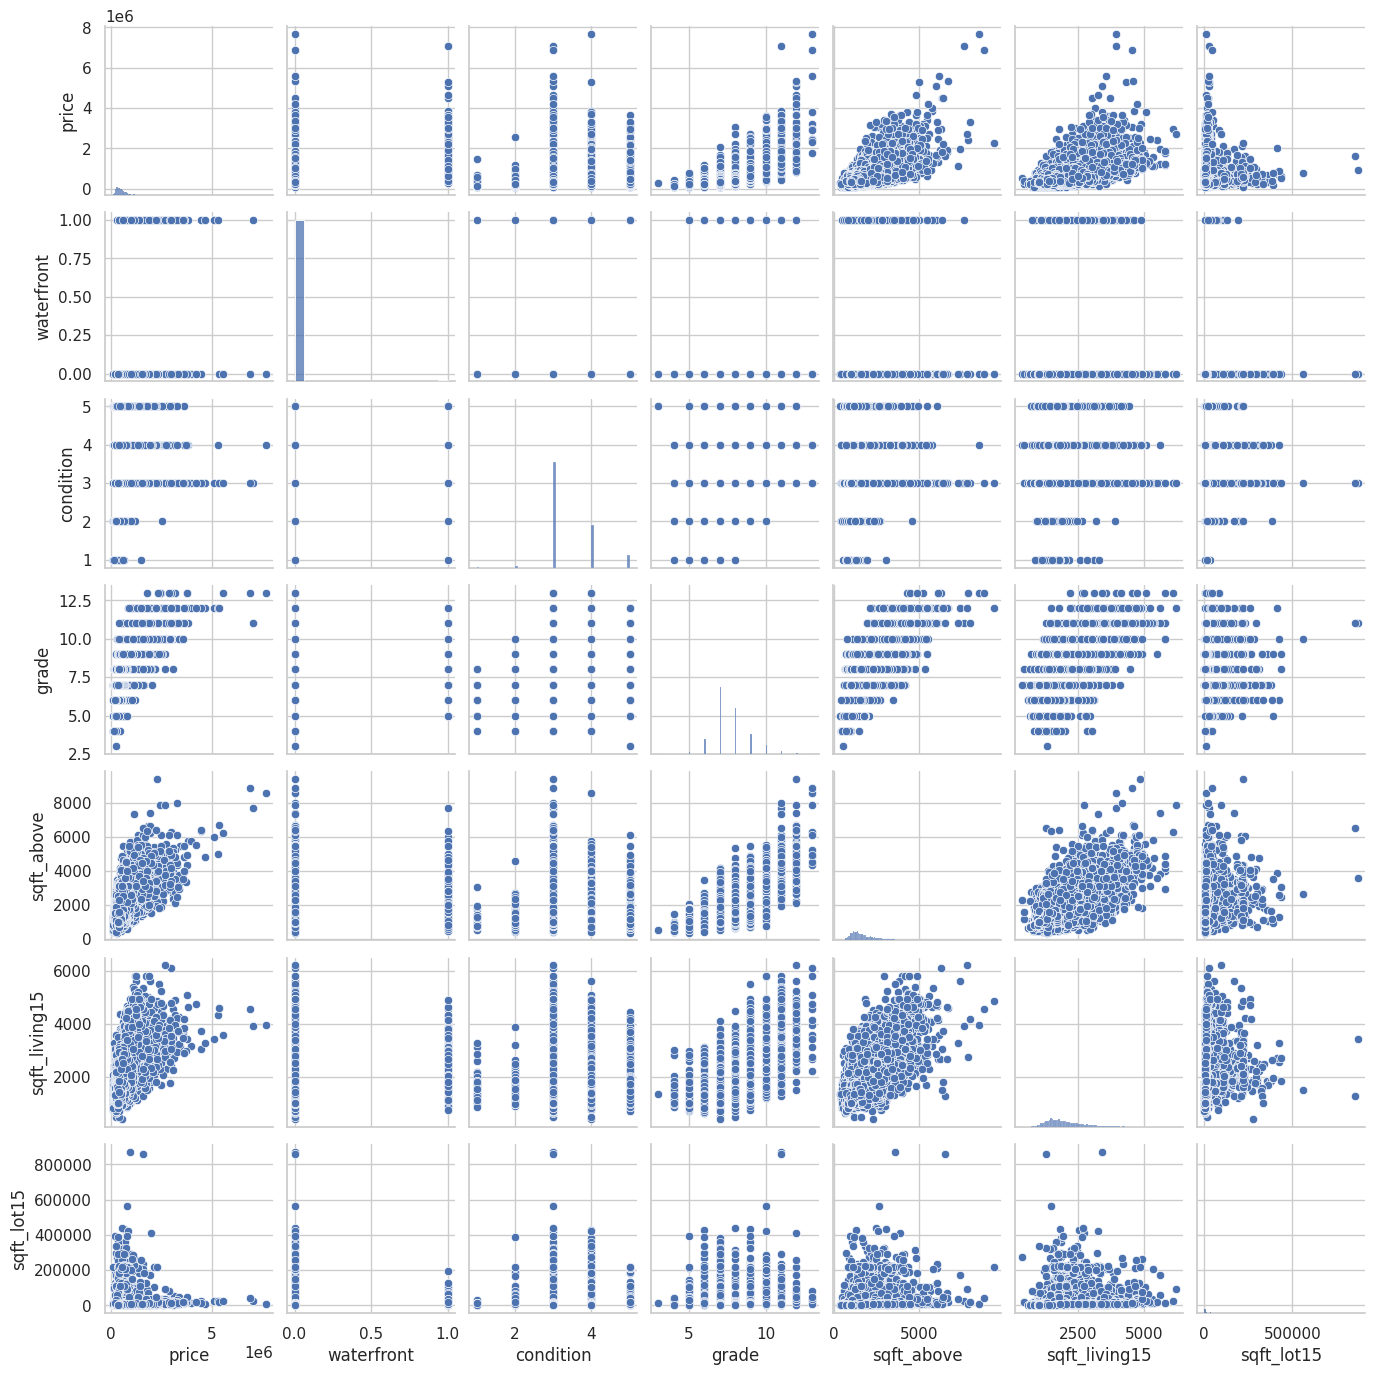

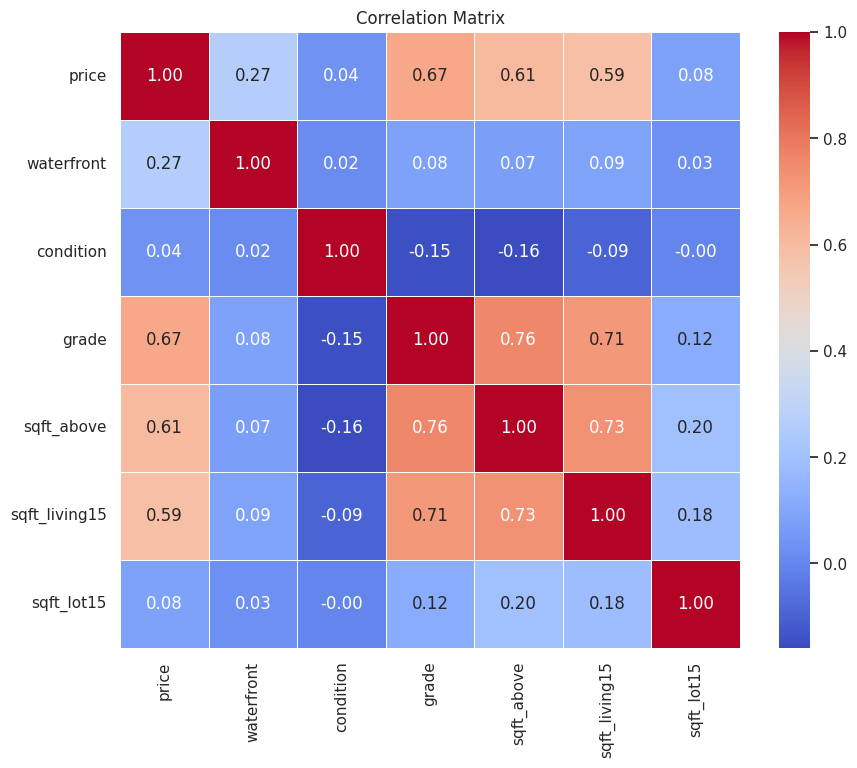

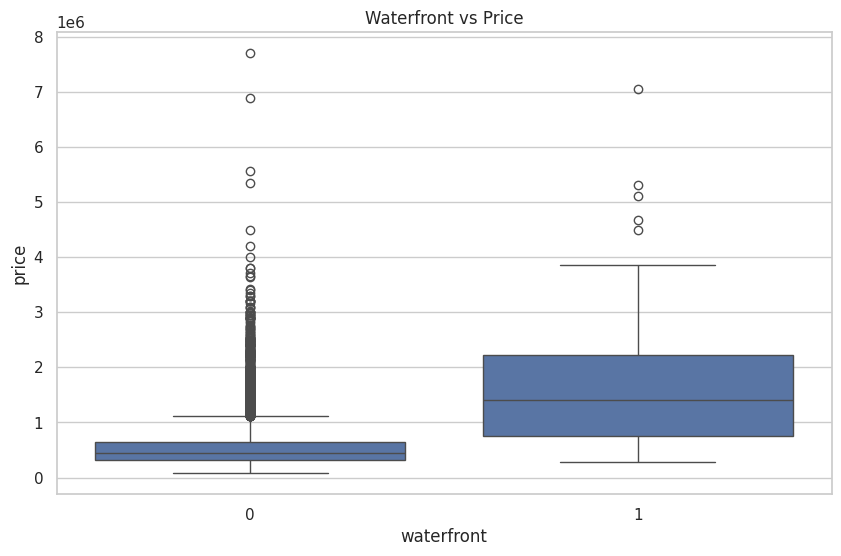

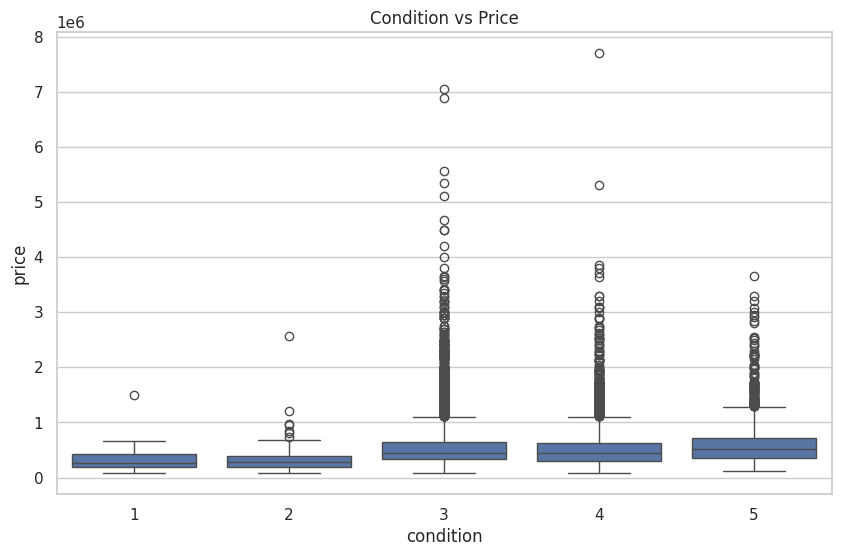

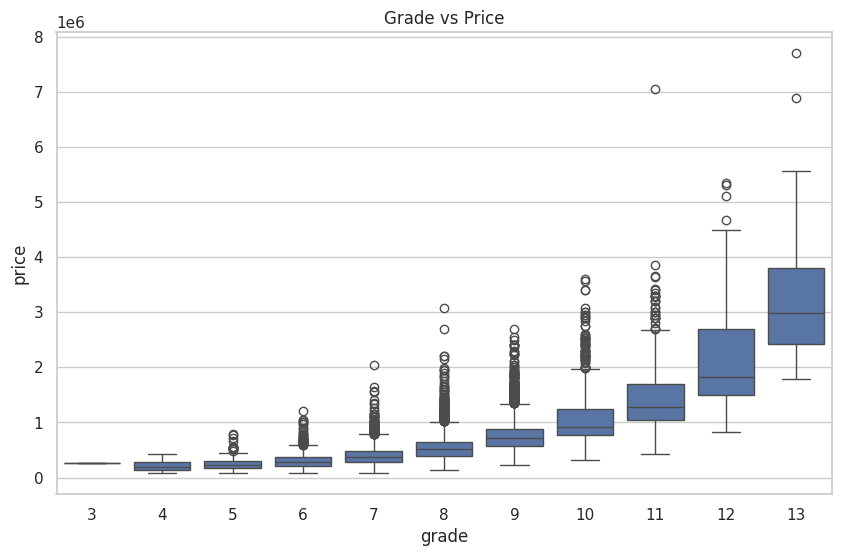

Characteristics of Houses with Price > $650K:
          bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  5205.000000  5205.000000   5205.000000  5.205000e+03  5205.000000   
mean      3.830355     2.687752   3020.285495  2.139565e+04     1.717099   
std       0.889473     0.791278   1028.934611  6.068848e+04     0.493068   
min       1.000000     0.750000    890.000000  5.200000e+02     1.000000   
25%       3.000000     2.250000   2350.000000  5.401000e+03     1.000000   
50%       4.000000     2.500000   2910.000000  8.616000e+03     2.000000   
75%       4.000000     3.250000   3520.000000  1.455000e+04     2.000000   
max      10.000000     8.000000  13540.000000  1.651359e+06     3.500000   

        waterfront         view    condition        grade   sqft_above  ...  \
count  5205.000000  5205.000000  5205.000000  5205.000000  5205.000000  ...   
mean      0.025552     0.634774     3.462440     8.869933  2553.876273  ...   
std       0.157811     1.204710 

In [ ]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a pair plot to visualize relationships between numeric variables
numeric_columns = ['price', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']
sns.pairplot(real_estate[numeric_columns], height=2)
plt.show()

# Create a heatmap to visualize correlations between variables
correlation_matrix = real_estate[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Create boxplots to compare categorical variables with price
categorical_columns = ['waterfront', 'condition', 'grade']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=real_estate)
    plt.title(f"{column.capitalize()} vs Price")
    plt.show()

# Explore factors responsible for higher property values
high_value_properties = real_estate[real_estate['price'] > 650000]
print("Characteristics of Houses with Price > $650K:")
print(high_value_properties.describe())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = real_estate[['waterfront', 'condition', 'bedrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']]
y = real_estate['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Analyze Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nCoefficients:")
print(coefficients)

# Filter features with coefficients for higher property values
high_value_features = coefficients[coefficients['Coefficient'] > 0]

print("\nFactors responsible for higher property value ($650K and above):")
print(high_value_features)

Mean Squared Error: 61254344139.51603
R-squared: 0.5295953464023823

Coefficients:
         Feature    Coefficient
0     waterfront  855195.761430
1      condition   80527.380546
2       bedrooms    4475.774549
3          grade  138214.372141
4     sqft_above      79.354127
5  sqft_living15      77.303941
6     sqft_lot15      -0.569374

Factors responsible for higher property value ($650K and above):
         Feature    Coefficient
0     waterfront  855195.761430
1      condition   80527.380546
2       bedrooms    4475.774549
3          grade  138214.372141
4     sqft_above      79.354127
5  sqft_living15      77.303941


In [ ]:
# Print the predicted prices for the testing set
print("Predicted Prices for Testing Set:")
print(y_pred)

Predicted Prices for Testing Set:
[ 91241.9812239  244942.26472829 348952.01775212 ... 372512.91153259
 421628.05796371 358472.98476782]


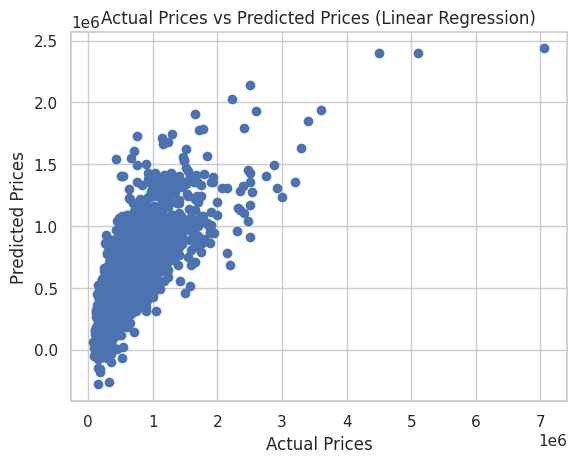

In [ ]:
# Plotting the actual prices vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()

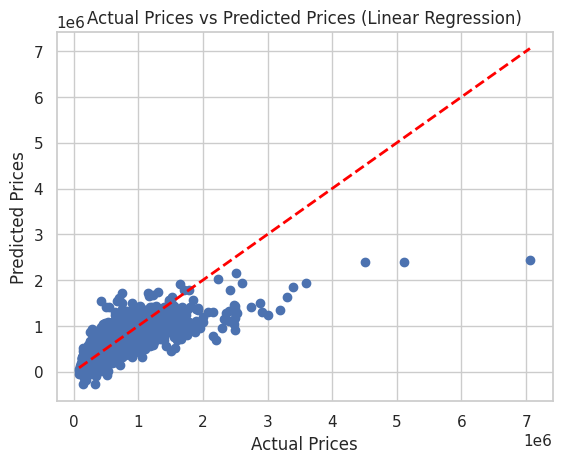

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the Linear Regression Model using scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (Scaled): {mse_scaled}')
print(f'R-squared (Scaled): {r2_scaled}')

Mean Squared Error (Scaled): 61254344139.52077
R-squared (Scaled): 0.5295953464023458


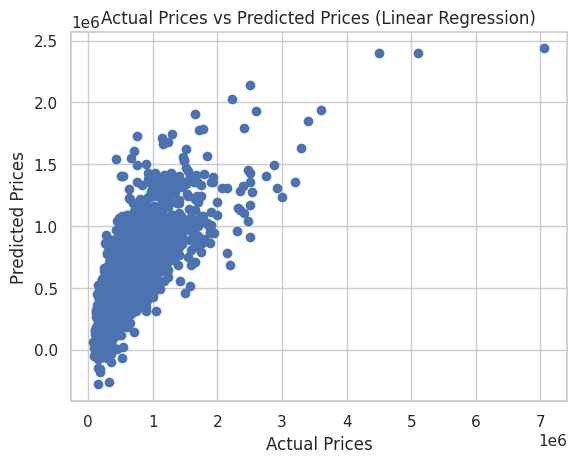

In [ ]:
# Plotting the actual prices vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.show()

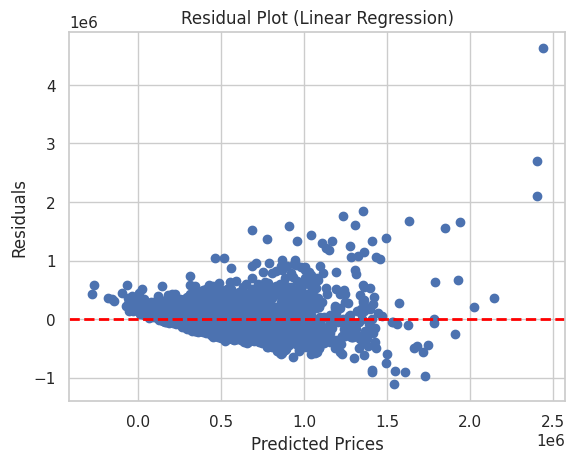

In [ ]:
# Plotting the residuals (the differences between actual and predicted prices)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()

Avobe 650k price: 5205
Bellow 650k price: 16275


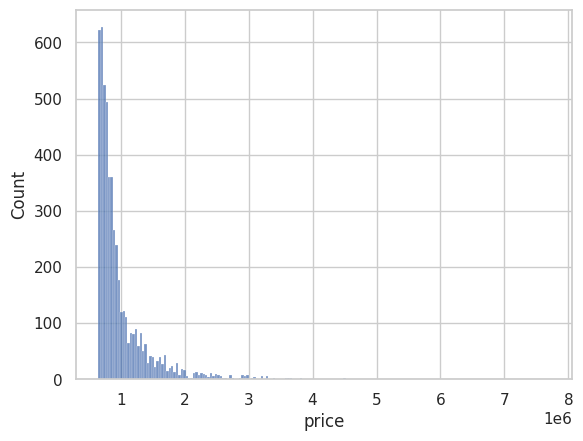

In [ ]:
# Check the number of properties that are avobe 650K of price
sns.histplot(real_estate[(real_estate['price'] > 650000)]['price'])
print("Avobe 650k price:", len(real_estate[(real_estate['price'] > 650000)]))
print("Bellow 650k price:", len(real_estate[real_estate['price'] < 650000]))